<a href="https://colab.research.google.com/github/kwon0915/Kwon-Hyeong-Joong/blob/master/pima_indian_diabets_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, roc_curve, classification_report, precision_recall_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Binarizer, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

import tensorflow as tf
from keras.models import Sequential #Sequential안에 모델을 하나하나 쌓아야함
from keras.layers import Dense #층별로 쌓음

import warnings
warnings.filterwarnings(action="ignore") #경고메세지 무시해라

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/self/indian.csv')  #데이터 가져오기
print(df.info())
print(df.head()) #Outcome:Target 함수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.3

In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"] #target
print(X.shape, y.shape) #(768, 8) (768,)

(768, 8) (768,)


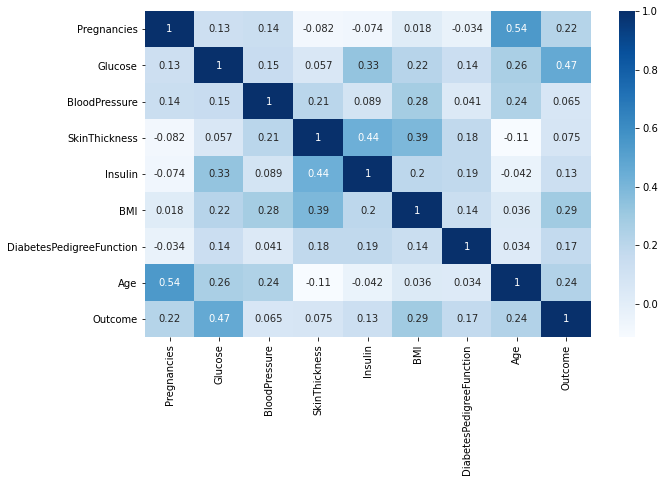

In [ ]:
#--- 분석 : 결측 X     : isnull()  dropna()  fillna()
#--- 분석 : Object X  : oh.Encoding():010  pd.getDummy():결측처리+인코딩(글자->수치)
#--- 상관분석
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True,  fmt=".2g", cmap="Blues")
plt.show()

In [ ]:
def CHART_PLOT_HISTORY(history): #함수화
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch #epoch은 history.epoch으로 가져옴(데이터 자체에서 가져옴)

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],    label='acc')
    plt.plot(hist['epoch'], hist['val_accuracy'],label = 'val_acc')
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],    label='loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'val_loss')
    plt.legend()
    plt.show()

In [ ]:
def GET_MY_SCORE(y_test, pred, str=None): #파라미터 값으로 넘기기
    print("---------{}----------".format(str))
    acc = accuracy_score(y_test, pred) #정확도
    f1 = f1_score(y_test, pred)        #조화평균
    recall = recall_score(y_test, pred) # 재현률
    precision = precision_score(y_test, pred) #정밀도
    rocauc = roc_auc_score(y_test, pred)
    print("정확도:{:.4f} F1:{:.4f}=(정밀도:{:.4f} 재현율:{:.4f}) rocauc:{:.4f}".format(acc, f1, precision, recall, rocauc))
    cf_matrix = confusion_matrix(y_test, pred) #혼동행렬
    print(cf_matrix)

In [ ]:
np.random.seed(121)
tf.random.set_seed(121)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)
model = Sequential() #랜덤포레스트처럼 모델 사용
model.add(Dense(units=16, input_dim=8, activation="relu")) #input dim: 타겟데이터 제외 8개
model.add(Dense(units=8, activation="relu"))
model.add(Dense(units=1, activation="sigmoid")) # softmax 2 , 또는 sigmoid 1
print(model.summary()) #메모리 연산량 볼 수 있음
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]) #sigmoid니까 binary로 
#_crossentropy : 들어온 값의 확률값을 계산

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10) #val_loss : 평가 손실률에서 10번 이상(patience) 진전이 없을때 멈춤

In [ ]:
#model.fit(X, y, epochs=100, validation_split=0.2) #validation_data : 평가데이터
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, callbacks=[early_stop]) #위에서 7:3 나눴으면 이렇게 코드 쓰기
#이미지, 사운드, 텍스쳐, 시계열 같은 것 이외의 회귀, 분류는 feature 전처리 해줘야 점수가 올라감(머신러닝처럼 해줌)

Epoch 1/100
20/20 [==============================] - 1s 29ms/step - loss: 10.4724 - accuracy: 0.4166 - val_loss: 2.8805 - val_accuracy: 0.5649
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 2.9618 - accuracy: 0.6322 - val_loss: 1.7615 - val_accuracy: 0.6299
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 1.3714 - accuracy: 0.6416 - val_loss: 1.0836 - val_accuracy: 0.6104
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.9284 - accuracy: 0.6171 - val_loss: 0.8641 - val_accuracy: 0.6104
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7196 - accuracy: 0.6302 - val_loss: 0.7958 - val_accuracy: 0.6364
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7414 - accuracy: 0.6218 - val_loss: 0.7627 - val_accuracy: 0.6429
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.6882 - val_loss: 0.7590 - val_accuracy: 0.6429
Epoch 8/100

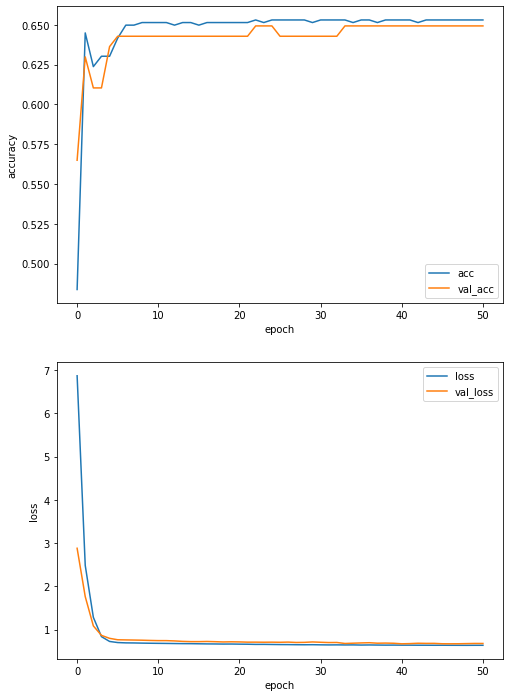

In [ ]:
CHART_PLOT_HISTORY(history)

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0) #evaluate : 평가
print('테스트 정확도:', test_acc)

테스트 정확도: 0.649350643157959


In [ ]:
pred = model.predict(X_test) #실제 X_test를 넣고 잘 맞추는지 예측

In [ ]:
print(y_test.shape, pred.shape) #(154,) (154,1) - 이렇게 나옴 -> (154,) (154,) #y_test답지와 예측 답지
print(y_test[:5], pred[:5]) #crossentropy이므로 확률값으로 계산 -> 이산형이므로 binarizer로 임계치 이상이면 1, 아니면 0
# 601    0
# 224    0
# 766    1
# 17     1
# 369    1

(154,) (154, 1)
601    0
224    0
766    1
17     1
369    1
Name: Outcome, dtype: int64 [[0.40622634]
 [0.40622634]
 [0.40622634]
 [0.40622634]
 [0.40622634]]


In [ ]:
#0과 1은 0.0 ~ 0.99 와 비교를 못하므로
bn = Binarizer(threshold=0.5) #Binarizer 을 통해서 임계치의 일정값을 넘으면 1 미만일때는 0으로 계산하기위해서 사용 ,
bn_pred = bn.fit_transform(pred.reshape(-1,1)) #확률값이 아닌 0,1 로 찍힘/ #reshape했더니 행렬이 되서 비교불가 -> 다시 array로 바꿔야함
print(bn_pred[:5])
bn_pred = np.array(bn_pred)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
bn_pred = bn_pred.flatten() #flatten 1열로 펴주는 것
print(bn_pred[:5], bn_pred.shape) #np.array대신 flatten 함수 사용 가능
GET_MY_SCORE(y_test, bn_pred, "최초점수") #positive를 잘 못맞추는 문제(암으로 비유하자면 암인데 정상이라고 집으로 돌려보내는 상황) -> 양성비율 학습 시키던가 전처리 해야함.

[0. 0. 0. 0. 0.] (154,)
---------최초점수----------
정확도:0.6494 F1:0.0000=(정밀도:0.0000 재현율:0.0000) rocauc:0.5000
[[100   0]
 [ 54   0]]


In [ ]:
#0값 처리(0인값들을 결측치를 채워서 점수를 올리기 위해서 ( 머신러닝 코드)) , 결측치를 채워서 점수를 올라가는지 안올라가는지 확인
for col in X.columns:
    gcnt = X[col][X[col]==0].count()
    print(col, gcnt, np.round(gcnt/X.shape[0]*100, 2)) #해당 건수와 percentage로 함
# Glucose 5 0.65
# BloodPressure 35 4.56
# SkinThickness 227 29.56
# Insulin 374 48.7
# BMI 11 1.43

Pregnancies 111 14.45
Glucose 5 0.65
BloodPressure 35 4.56
SkinThickness 227 29.56
Insulin 374 48.7
BMI 11 1.43
DiabetesPedigreeFunction 0 0.0
Age 0 0.0


In [ ]:
print(X[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].describe())   #Insulin 조치 취해야함(편차(평균으로부터 떨어진 차이)도 너무 큼.max 846? 등의 outlier). 따라서 평균보다는 중위값이 적당 #describe를 통해 평균쓸지 중위값 쓸지 결정
zero_column = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
zero_column_median = X[zero_column].median().round(1)
X[zero_column] = X[zero_column].replace(0, zero_column_median)

          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   120.894531      69.105469      20.536458   79.799479   31.992578
std     31.972618      19.355807      15.952218  115.244002    7.884160
min      0.000000       0.000000       0.000000    0.000000    0.000000
25%     99.000000      62.000000       0.000000    0.000000   27.300000
50%    117.000000      72.000000      23.000000   30.500000   32.000000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


In [ ]:
bn_pred = bn.fit_transform(pred.reshape(-1,1)).flatten()
GET_MY_SCORE(y_test, bn_pred, "outlier제거 이후 점수")

---------outlier제거 이후 점수----------
정확도:0.6494 F1:0.0000=(정밀도:0.0000 재현율:0.0000) rocauc:0.5000
[[100   0]
 [ 54   0]]
